In [ ]:
# LSTM : 시퀀스가 길수록 순환되는 은닉 상태에 담긴 정보가 점차 희석되기 때문에 LSTM이 발명됨
# 셀상태 : 다음 픙으로 전달되지 않고 LSTM셀에서 순환만 되는 값
# 셀상태를 기준으로 삭제게이트, 입력게이트, 출력게이트가 존재
# LSTM셀에는 작은 셀이 4개 존재

In [ ]:
# LSTM 신경망 훈련하기
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

17464789/17464789 [==============================] - 11s 1us/step


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
             metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5',
                                               save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                   validation_data=(val_seq, val_target),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 27ms/step - loss: 0.6928 - accuracy: 0.5282 - val_loss: 0.6926 - val_accuracy: 0.5390
Epoch 2/100
  4/313 [..............................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5352 

C:\ProgramData\Anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 8s 24ms/step - loss: 0.6920 - accuracy: 0.5608 - val_loss: 0.6916 - val_accuracy: 0.5580
Epoch 3/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6906 - accuracy: 0.5892 - val_loss: 0.6897 - val_accuracy: 0.5974
Epoch 4/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6872 - accuracy: 0.6194 - val_loss: 0.6846 - val_accuracy: 0.6362
Epoch 5/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6774 - accuracy: 0.6546 - val_loss: 0.6668 - val_accuracy: 0.6696
Epoch 6/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6335 - accuracy: 0.6952 - val_loss: 0.6104 - val_accuracy: 0.7070
Epoch 7/100
313/313 [==============================] - 8s 25ms/step - loss: 0.5909 - accuracy: 0.7244 - val_loss: 0.5851 - val_accuracy: 0.7238
Epoch 8/100
313/313 [==============================] - 8s 25ms/step - loss: 0.5653 - accuracy: 0.7380 - val_loss: 0.5598 - val_accuracy: 0.7368
Epoc

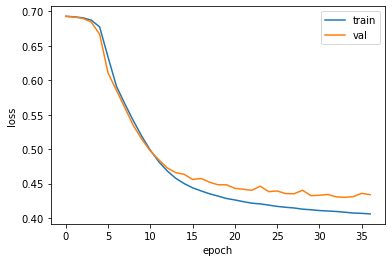

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# 드롭아웃적용하기 dropout매개변수가 LSTM에 존재
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 29ms/step - loss: 0.6928 - accuracy: 0.5223 - val_loss: 0.6924 - val_accuracy: 0.5492
Epoch 2/100
  4/313 [..............................] - ETA: 7s - loss: 0.6923 - accuracy: 0.5430 

C:\ProgramData\Anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 8s 26ms/step - loss: 0.6916 - accuracy: 0.5616 - val_loss: 0.6911 - val_accuracy: 0.5848
Epoch 3/100
313/313 [==============================] - 8s 27ms/step - loss: 0.6897 - accuracy: 0.6005 - val_loss: 0.6887 - val_accuracy: 0.6124
Epoch 4/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6862 - accuracy: 0.6218 - val_loss: 0.6839 - val_accuracy: 0.6262
Epoch 5/100
313/313 [==============================] - 8s 27ms/step - loss: 0.6781 - accuracy: 0.6407 - val_loss: 0.6720 - val_accuracy: 0.6528
Epoch 6/100
313/313 [==============================] - 8s 27ms/step - loss: 0.6536 - accuracy: 0.6786 - val_loss: 0.6251 - val_accuracy: 0.7048
Epoch 7/100
313/313 [==============================] - 8s 26ms/step - loss: 0.5885 - accuracy: 0.7097 - val_loss: 0.5678 - val_accuracy: 0.7244
Epoch 8/100
313/313 [==============================] - 8s 27ms/step - loss: 0.5550 - accuracy: 0.7327 - val_loss: 0.5424 - val_accuracy: 0.7456
Epoc

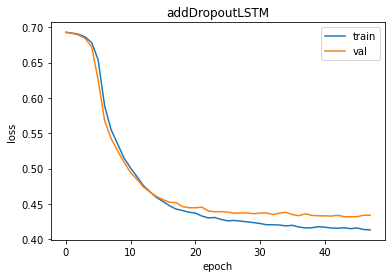

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.title('addDropoutLSTM')
plt.show()

In [ ]:
# 여러 개의 층을 연결하기(순환층에 순차 데이터를 출력시키기)
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True)) # return_sequences=True : 모든 타임스템의 은닉 상태를 출력할지 결정
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model3.summary()
# 첫번째 LSTM층이 다음 층의 입력을 위해 모든 타임스텝(100개)의 은닉 상태를 출력하기 때문에 출력크기가 (None, 100, 8)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 21s 55ms/step - loss: 0.6930 - accuracy: 0.5099 - val_loss: 0.6930 - val_accuracy: 0.4882
Epoch 2/100
  3/313 [..............................] - ETA: 13s - loss: 0.6926 - accuracy: 0.5260

C:\ProgramData\Anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 16s 50ms/step - loss: 0.6928 - accuracy: 0.5242 - val_loss: 0.6926 - val_accuracy: 0.5094
Epoch 3/100
313/313 [==============================] - 16s 51ms/step - loss: 0.6919 - accuracy: 0.5717 - val_loss: 0.6910 - val_accuracy: 0.6020
Epoch 4/100
313/313 [==============================] - 16s 51ms/step - loss: 0.6879 - accuracy: 0.6116 - val_loss: 0.6826 - val_accuracy: 0.6506
Epoch 5/100
313/313 [==============================] - 16s 51ms/step - loss: 0.6616 - accuracy: 0.6546 - val_loss: 0.6244 - val_accuracy: 0.6834
Epoch 6/100
313/313 [==============================] - 16s 51ms/step - loss: 0.5971 - accuracy: 0.6971 - val_loss: 0.5697 - val_accuracy: 0.7164
Epoch 7/100
313/313 [==============================] - 16s 52ms/step - loss: 0.5611 - accuracy: 0.7225 - val_loss: 0.5417 - val_accuracy: 0.7342
Epoch 8/100
313/313 [==============================] - 16s 51ms/step - loss: 0.5363 - accuracy: 0.7416 - val_loss: 0.5189 - val_accuracy: 0.74

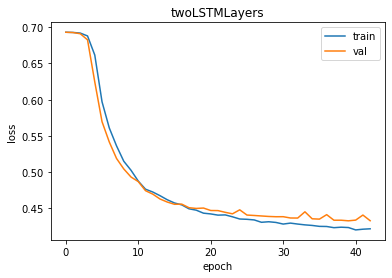

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.title('twoLSTMLayers')
plt.show()

In [ ]:
# GRU모델
# LSTM을 간소화한 버전으로 LSTM 못지 않은 좋은 성능을 냄
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500,16,input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model4.summary()
# GRU층의 모델 파라미터 개수 : 16*8(1토큰*뉴런) + 8*8(은닉상태가중치) + 8(절편) = 200
# GPU를 잘 활용하기 위한 구조에서 각 셀마다 별도의 절편이 필요하다

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 30ms/step - loss: 0.6922 - accuracy: 0.5246 - val_loss: 0.6914 - val_accuracy: 0.5360
Epoch 2/100
313/313 [==============================] - 9s 30ms/step - loss: 0.6903 - accuracy: 0.5541 - val_loss: 0.6891 - val_accuracy: 0.5570
Epoch 3/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6873 - accuracy: 0.5798 - val_loss: 0.6856 - val_accuracy: 0.5706
Epoch 4/100
313/313 [==============================] - 10s 34ms/step - loss: 0.6826 - accuracy: 0.5978 - val_loss: 0.6803 - val_accuracy: 0.5920
Epoch 5/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6754 - accuracy: 0.6136 - val_loss: 0.6720 - val_accuracy: 0.6096
Epoch 6/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6641 - accuracy: 0.6284 - val_loss: 0.6591 - val_accuracy: 0.6270
Epoch 7/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6471 - accuracy: 0.6490 - val_loss: 0.6397 - val_acc

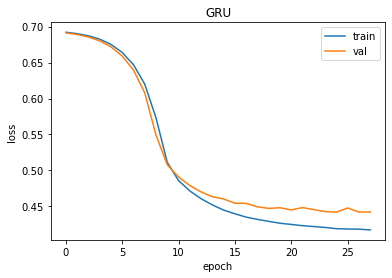

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.title('GRU')
plt.show()

In [ ]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 14s 17ms/step - loss: 0.4285 - accuracy: 0.7998


[0.4284612536430359, 0.7997999787330627]